## Notebook 8: Basics of Pandas for data analysis
In this Notebook we learn how to do basic data analysis with `pandas`.

In [1]:
# We will probably need these
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading real data with Pandas
Real data is often stored in CSV files (Comma Separated Values, although the values can be separated by other things than commas).
So far, we have loaded csv files with the `np.loadtxt` command en `np.genfromtxt`
The `loadtxt` function has some basic functionality and works just fine, but when we have more elaborate data sets we want more sophisticated functionality. 
The most powerful and advanced package for data handling and analysis is called `pandas`. We will use only a few functions of the `pandas` package here. Full information on `pandas` can be found on the [pandas website](http://pandas.pydata.org/).

Consider the following dataset, which is stored in the file `transport.csv`. It shows the percentage of transportation kilometers by car, bus or rail for four countries. The dataset has four columns. 

`country, car, bus, rail`  
`some more explanations, yada yada yada`  
`France, 86.1, 5.3, 8.6`  
`Germany, 85.2, 7.1, 7.7`  
`Netherlands, 86.4, 4.6, 9`  
`United Kingdom, 88.2, 6.5, 5.3` 

This data file can be loaded with the `read_csv` function of the `pandas` package. The `read_csv` function has many options. We will use three of them here. The rows that need to be skipped are defined with the `skiprows` keyword (in this case row 1 with the `yada yada` text). The `skipinitialspace` keyword is set to `True` so that the column name ' car' is loaded without the initial space that is in the data file. And the `index_col` keyword is set to indicate that the names in column 0 can be used as an index to select a row.

In [2]:
from pandas import read_csv

In [3]:
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

In [4]:
tran.head()

,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


`pandas` loads data into a `DataFrame`. A `DataFrame` is like an array, but has many additional features for data analysis. For starters, once you have loaded the data, you can print it to the screen

In [5]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


When the DataFrame is large, you can still print it to the screen (`pandas` is smart enough not to show the entire DataFrame when it is very large), or you can simply print the first 5 lines of the DataFrame with the `.head()` function. 

Another nice option is that you can use the `display` function of the `IPython.display` package to display the DataFrame to the screen. You just have to import the `display` function so you can use it in the Notebook.

In [6]:
from IPython.display import display
display(tran)

,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


### Basic DataFrame manipulation
The rows and columns of a DataFrame may have names (as you can see for the `tran` `DataFrame` above, when we printed it to the screen. To find out which names are used for the columns, use the `keys` function, which is accessible with the dot syntax. You can loop through the names of the columns if you wish.

In [7]:
print('Names of columns:')
print(tran.keys())
for key in tran.keys():
    print(key)

Names of columns:
Index(['car', 'bus', 'rail'], dtype='object')
car
bus
rail


In [8]:
print('Names of columns:')
print(tran.columns)
for col in tran.columns:
    print(col)


Names of columns:
Index(['car', 'bus', 'rail'], dtype='object')
car
bus
rail


Each DataFrame may be indexed just like an array, by specifying the row and column number using the `.iloc` syntax (which stands for *index location*), where column 0 is the column labeled `car` (since the column labeled as `country` was stored as an index when reading the csv file; more on that later).

In [9]:
print(tran.iloc[0, 1])  # gives the bus data for France
print(tran.iloc[1, 0])  # gives the car data for Germany
print(tran.iloc[2, 2])  # gives the rail data for Netherlands
print(tran.iloc[3])     # all data for United Kindom
print(tran.iloc[:, 1])  # all data for bus

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


Alternatively, values in a DataFrame may be selected by specifying the indices by name, using the `.loc` syntax. This is a bit more typing but *much* more explicit. The equivalent of the code cell above, but using indices by name is

In [10]:
print(tran.loc['France', 'bus'])
print(tran.loc['Germany', 'car'])
print(tran.loc['Netherlands', 'rail'])
print(tran.loc['United Kingdom'])
print(tran.loc[:, 'bus'])

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


There are two alternative ways to access all the data in a column. First, you can simply specify the column name as an index, without having to use the `.loc` syntax. Second, the dot syntax may be used, like syntax `.column_name`, where `column_name` is the name of the column. Hence, the following three are equivalent

In [11]:
print(tran.loc[:,'car'])  # all rows of 'car' column
print(tran['car'])        # 'car' column 
print(tran.car)

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64


### `numpy` functions for DataFrames
`DataFrame`s can be pretty much treated as arrays, especially when they contain data. Most `numpy` functions work on `DataFrame`s, but they can also be accessed with the *dot* syntax, like `dataframe_name.function()`. Simply type 

`tran.` 

in a code cell and then hit the [tab] key to see all the functions that are available (there are many). In the code cell below, we compute the maximum value of transportation by car, the country corresponding to the maximum value of transportation by car, and the mean value of all transportation by car. 

In [12]:
print('maximum car travel percentage:', tran.car.max())
print('country with maximum car travel percentage:', tran.car.argmax())
print('mean car travel percentage:', tran.car.mean())
print('all rail travel above 8 percent:')

maximum car travel percentage: 88.2
country with maximum car travel percentage: United Kingdom
mean car travel percentage: 86.47500000000001
all rail travel above 8 percent:


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


You can also find all values larger than a specified value, just like for arrays.

In [13]:
print(tran.rail[tran.rail > 8])

country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64


The code above identified France and Netherlands as the countries with more than 8% transport by rail, but the code returned a series with the country names and the value in the rail column. If you only want the names of the coutries, you need to ask for the values of the index column

In [14]:
tran[tran.rail > 8].index.values

array(['France', 'Netherlands'], dtype=object)

In [15]:
print(tran.index[tran.rail > 8].values)

['France' 'Netherlands']


### Exercise 1. <a name="back1"></a>Average annual rainfall by country
The file `annual_precip.csv` contains the average yearly rainfall and total land area for all the countries in the world (well, there are some missing values);  the data is available on the website of the <a href="http://data.worldbank.org/">world bank</a>. Open the data file to see what it looks like (Notepad, Textedit, even Word if you have to, or use [File][Open] from the Jupyter menu). Load the data with the `read_csv` function of `pandas`, making sure that the names of the countries can be used to select a row, and perform the following tasks:

* Print the first 5 lines of the DataFrame to the screen with the `.head()` function.
* Print the average annual rainfall for Panama and make sure to include the units.
* Report the total land area of the Netherlands and make sure to include the units.
* Report all countries with an average annual rainfall less than 200 mm/year
* Report all countries with an average annual rainfall more than 2500 mm/year
* Report all countries with an average annual rainfall that is within 50 mm/year of the average annual rainfall in the Netherlands

In [16]:
annual_precip = read_csv('annual_precip.csv', skiprows=2, index_col=0)

In [17]:
annual_precip.head()

,precip,area
country,,
Afghanistan,327.0,652.2
Albania,1485.0,27.4
Algeria,89.0,2381.7
American Samoa,NaN,0.2
Andorra,NaN,0.5


In [18]:
print('Average annual rainfall in Panama is',annual_precip.loc['Panama', 'precip'],'mm/year')

print('Land area of the Netherlands is', annual_precip.loc['Netherlands','area'], 'thousand km^2')

print('Countries where average rainfall is below 200 mm/year')
print(annual_precip[annual_precip.precip < 200])


print()
print('Countries where average rainfall is above 2500 mm/year')
print(annual_precip[annual_precip.precip > 2500])

print()
print('Countries with almost the same rainfall as Netherlands')
print(annual_precip[abs(annual_precip.precip - annual_precip.loc['Netherlands', 'precip']) < 50])

Average annual rainfall in Panama is 2692.0 mm/year
Land area of the Netherlands is 33.7 thousand km^2
Countries where average rainfall is below 200 mm/year
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.0    83.6
Yemen, Rep.            167.0   528.0

Countries where average rainfall is above 2500 mm/year
                       precip    area
country                              
Bangladesh             2666.0   130.2
Brunei Darussalam      2722.0     5.3
Colombia               2612.0  1109.5
Costa

### Adding a column to a DataFrame
A column may be added to a DataFrame by simply specifying the name and values of the new column using the syntax `DataFrame['newcolumn']=something`. For example, let's add a column named `public_transport`, which is the sum of the `bus` and `rail` columns, and then find the country with the largest percentage of public transport

In [19]:
tran['public_transport'] = tran.bus + tran.rail
print('Country with largest percentage public transport:', tran.public_transport.argmax())

Country with largest percentage public transport: Germany


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


In [20]:
tran.head()

,car,bus,rail,public_transport
country,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


### Plotting DataFrames
You can plot the column or row of a DataFrame with `matplotlib` functions, as we have done in previous Notebooks, but `pandas` has also implemented its own, much more convenient, plotting functions (still based on `matplotlib` in the background, of course). The plotting capabilities of `pandas` also use the *dot* syntax, like `dataframe.plot()`. All columns can be plotted simultaneously (note that the names appear on the axes and the legend is added automatically!).

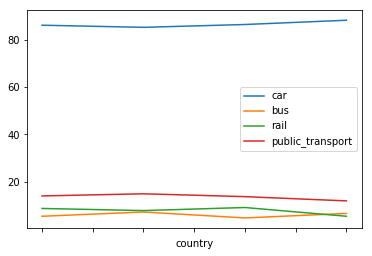

In [21]:
tran.plot();  # plot all columns

You can also plot one column at a time. The style of the plot may be specified with the `kind` keyword (the default is `'line'`). Check out `tran.plot?` for more options. 

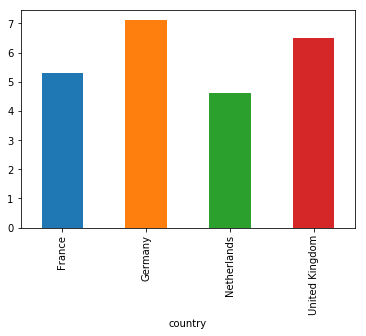

In [22]:
tran['bus'].plot(kind='bar');

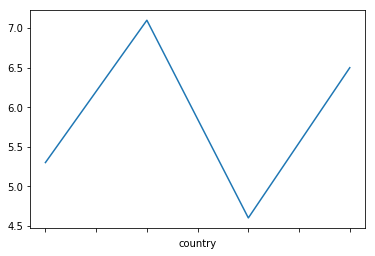

In [23]:
tran['bus'].plot(kind='line')

### Sorting DataFrames
DataFrames may be sorted with the `.sort_values` function. The keyword `inplace=True` replaces the values in the DataFrame with the new sorted values (when `inplace=False` a new DataFrame is returned, which you can store in a separate variable so that you have two datasets, one sorted and one unsorted). The `sort_values` funcion has several keyword arguments, including `by` which is either the name of one column to sort by or a list of columns so that data is sorted by the first specified column and when values are equal they are sorted by the next column in the list. Another keyword is `ascending`, which you can use to specify whether to sort in ascending order (`ascending=True`, which is the default), or descending order (`ascending=False`)

In [24]:
print('Data sorted by car use:')
display(tran.sort_values(by='car'))
print('Data sorted by bus use:')
display(tran.sort_values(by='bus'))

Data sorted by car use:


,car,bus,rail,public_transport
country,,,,
Germany,85.2,7.1,7.7,14.8
France,86.1,5.3,8.6,13.9
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


Data sorted by bus use:


,car,bus,rail,public_transport
country,,,,
Netherlands,86.4,4.6,9.0,13.6
France,86.1,5.3,8.6,13.9
United Kingdom,88.2,6.5,5.3,11.8
Germany,85.2,7.1,7.7,14.8


### Renaming columns
Sometimes (quite often, really), the names of columns in a dataset are not very convenient (long, including spaces, etc.). For the example of the transportation data, the columns have convenient names, but let's change them for demonstration purposes. You can rename columns inplace, and you can change as many columns as you want. The old and new names are specified with a Python dictionary. A dictionary is a very useful data type. It is specified between braces `{}`, and links a word in the dictionary to a value. The value can be anything. You can then use the word in the dictionary as the index, just like you would look up a word in an paper dictionary.

In [25]:
firstdictionary = {'goals': 20, 'city': 'Delft'}
print(firstdictionary['goals'])
print(firstdictionary['city'])

20
Delft


Much more on Python dictionaries can be found, for example, [here](http://learnpythonthehardway.org/book/ex39.html). Let's continue with renaming two of the columns of the `tran` DataFrame:

In [26]:
tran.rename(columns={'bus': 'BUS', 
                     'rail': 'train'}, inplace=True)
display(tran)

,car,BUS,train,public_transport
country,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


The index column, with the countries, is now called `'country'`, but we can rename that too, for example to `'somewhere in Europe'`, with the following syntax

In [27]:
type(tran.index)

pandas.core.indexes.base.Index

In [28]:
type(tran.index.names)

pandas.core.indexes.frozen.FrozenList

In [29]:
tran.index.names = ['somewhere in Europe']
display(tran)

,car,BUS,train,public_transport
somewhere in Europe,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


### Exercise 2. <a name="back2"></a>Average annual rainfall by country continued
Continue with the average yearly rainfall and total land area for all the countries in the world and perform the following tasks:

* Add a new column that stores the total average annual freshwater influx in km$^3$/year for each country. Make sure you convert your units correctly. 
* Sort the data on the total average annual freshwater influx in ascending order and report the 5 countries with the largest annual freshwater influx using the `iloc` syntax. 
* Make a bar graph of the 10 countries with the largest annual freshwater influx.

In [30]:
annual_precip['totalq'] = annual_precip['precip'] * annual_precip['area'] * 1e-3

In [31]:
annual_precip.head()

,precip,area,totalq
country,,,
Afghanistan,327.0,652.2,213.2694
Albania,1485.0,27.4,40.6890
Algeria,89.0,2381.7,211.9713
American Samoa,NaN,0.2,NaN
Andorra,NaN,0.5,NaN


In [32]:
annual_precip.sort_values(by='totalq', ascending=False, inplace=True)

In [33]:
print('Five countries with largest annual influx:')
annual_precip.iloc[:5,:]

Five countries with largest annual influx:


,precip,area,totalq
country,,,
Brazil,1782.0,8459.4,15074.6508
Russian Federation,460.0,16376.9,7533.3740
United States,715.0,9147.4,6540.3910
China,645.0,9327.5,6016.2375
Indonesia,2702.0,1811.6,4894.9432


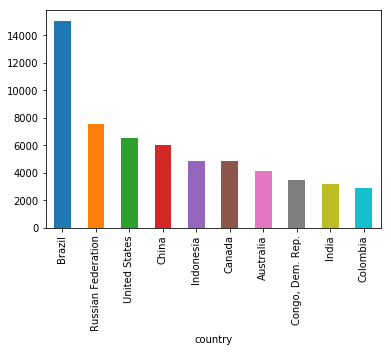

In [34]:
annual_precip.totalq[:10].plot(kind='bar')

### Time series data
In time series data, one of the columns represents dates, sometimes including times, together referred to as datetimes. `pandas` can be used to read csv files where one of the columns includes datetime data. You need to tell `pandas` which column contains datetime values and `pandas` will try to convert that column to datetime objects. Datetime objects are very convenient as specifics of the datetime object may be assessed with the dot syntax: `.year` returns the year, `.month` returns the month, etc.

For example, consider the following data stored in the file `timeseries1.dat`

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

The file may be read with `read_csv` using the keyword `parse_dates=[0]` so that column number 0 is converted to datetimes

In [35]:
data = read_csv('timeseries1.dat', parse_dates=['date'])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
date     5 non-null datetime64[ns]
 conc    5 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 160.0 bytes


In [37]:
data.head()

,date,conc
0,2014-04-01,0.19
1,2014-04-02,0.23
2,2014-04-03,0.32
3,2014-04-04,0.29
4,2014-04-05,0.32


###  `skipinitialspace=True`
if `skipinitialspace=True` is not used, the column name of conc is actually " conc" with a space at the front

In [38]:

data.columns

Index(['date', ' conc'], dtype='object')

In [39]:
data = read_csv('timeseries1.dat', parse_dates=[0], skipinitialspace=True)
display(data)

,date,conc
0,2014-04-01,0.19
1,2014-04-02,0.23
2,2014-04-03,0.32
3,2014-04-04,0.29
4,2014-04-05,0.32


In [40]:
data.columns

Index(['date', 'conc'], dtype='object')

The rows of the DataFrame `data` are numbered, as we have not told `pandas` what column to use as the index of the rows. The first column of the DataFrame `data` has datetime values. We can access, for example, the year, month, or day with the dot syntax

In [41]:
type(data.iloc[0, 0])

pandas._libs.tslib.Timestamp

In [42]:
print('datetime of row 0:', data.iloc[0, 0])
print('year  of row 0:', data.iloc[0, 0].year)
print('month of row 0:', data.iloc[0, 0].month)
print('day   of row 0:', data.iloc[0, 0].day)

datetime of row 0: 2014-04-01 00:00:00
year  of row 0: 2014
month of row 0: 4
day   of row 0: 1


Time series data may also contain the time in addition to the date. For example, the data of the file `timeseries2.dat`, shown below, contains the day and time. You can access the `hour` or `minutes`, but also the time of a row of the DataFrame with the `.time()` function.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [43]:
data2 = read_csv('timeseries2.dat', parse_dates=[0], skipinitialspace=True)
display(data2)
print('hour  of row 0:', data2.iloc[0, 0].hour)
print('minute  of row 0:', data2.iloc[0, 0].minute)
print('time of row 0:', data2.iloc[0, 0].time())

,date,conc
0,2014-04-01 12:00:00,0.19
1,2014-04-01 13:00:00,0.20
2,2014-04-01 14:00:00,0.23
3,2014-04-01 15:00:00,0.21


hour  of row 0: 12
minute  of row 0: 0
time of row 0: 12:00:00


### Setting values based on a condition
Values of a column may be changed based on a condition. For example, all values of the concentration above 0.2 may be set to 0.2 with the following syntax

In [44]:
data2.loc[data2.conc > 0.2, 'conc'] = 0.2
display(data2)

,date,conc
0,2014-04-01 12:00:00,0.19
1,2014-04-01 13:00:00,0.20
2,2014-04-01 14:00:00,0.20
3,2014-04-01 15:00:00,0.20


### Exercise 3,  <a name="back3"></a>Load and plot daily rainfall
Rainfall data for the Netherlands may be obtained from the website of the Royal Dutch Meteorological Society <A href="http://www.knmi.nl/climatology/daily_data/selection.cgi">KNMI</A> . Daily rainfall for the weather station Rotterdam in 2012 is stored in the file `rotterdam_rainfall_2012.txt`. First open the file in a text editor to see what the file looks like. At the top of the file, an explanation is given of the data in the file. Read this. Load the data file with the `read_csv` function of `pandas`. Use the keyword `skiprows` to skip all rows except for the row with the names of the columns. Use the keyword `parse_dates` to give either the name or number of the column that needs to be converted to a datetime. Don't forget the `skipinitialspace` keyword, else the names of the columns may start with a bunch of spaces. Perform the following tasks:
* Convert the rainfall data to mm/d.
* Some rainfall values in the dataset may be -1 (read the header of the file to learn why); set all rainfall values that are less than zero to zero. 
* Use the `plot` function of `pandas` to create a line plot of the daily rainfall with the number of the day (so not the date) along the horizontal axis. 
* Use `matplotlib` functions to add labels to the axes and set the limits along the horizontal axis from 0 to 365. 
* Determine the maximum daily rainfall and the date of the maximum daily rainfall and print them to the screen.

In [45]:
rain_dutch = read_csv('rotterdam_rainfall_2012.txt', skiprows=9, skipinitialspace=True, parse_dates=['YYYYMMDD'])

In [46]:
rain_dutch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
STN         366 non-null int64
YYYYMMDD    366 non-null datetime64[ns]
RH          366 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.7 KB


In [47]:
rain_dutch.tail()

,STN,YYYYMMDD,RH
361,344,2012-12-27,27
362,344,2012-12-28,18
363,344,2012-12-29,2
364,344,2012-12-30,23
365,344,2012-12-31,50


In [48]:
# convert to mm/d
rain_dutch['RH'] = rain_dutch['RH'] * 0.1
rain_dutch.loc[rain_dutch.RH < 0, 'RH'] = 0

(0, 365)

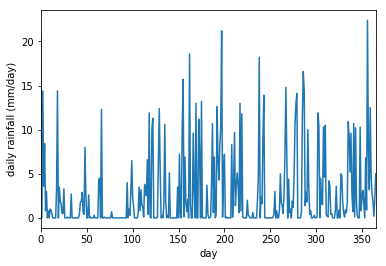

In [49]:
rain_dutch.RH.plot()
plt.xlabel('day')
plt.ylabel('daily rainfall (mm/day)')
plt.xlim(0, 365)

In [50]:
print('the maximum daily rainfall is', rain_dutch.RH.max(),'mm')
print('Date of maximum daily rainfall', rain_dutch.loc[rain_dutch.RH.argmax(), 'YYYYMMDD'])

the maximum daily rainfall is 22.400000000000002 mm
Date of maximum daily rainfall 2012-12-22 00:00:00


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


### Exercise 4,  <a name="back4"></a>Compute monthly rainfall from daily rainfall
In this exercise we are going to compute the total monthly rainfall for 2012 in the City of Rotterdam using the daily rainfall measurements we loaded in the previous Exercise. Later on in this Notebook we learn convenient functions from `pandas` to do this, but here we are going to do this with a loop. Create an array of 12 zeros to store the monthly totals and loop through all the days in 2012 to compute the total rainfall for each month. The month associated with each row of the DataFrame may be obtained with the `.month` syntax, as shown above. Print the monthly totals (in mm/month) to the screen and create a bar graph of the total monthly rainfall (in mm/month) vs. the month using the `plt.bar` function of matplotlib. 

In [51]:
monthly_rainfall = np.zeros(12)

In [52]:
for i in range(len(rain_dutch)):
    month = rain_dutch.iloc[i, 1].month
    monthly_rainfall[month - 1] += rain_dutch.iloc[i, 2]

In [53]:
monthly_rainfall

array([ 83. ,  24.3,  21.9,  57.6,  76.5, 119. , 121.6,  93.4,  52. ,
       132.6,  63.3, 149.5])

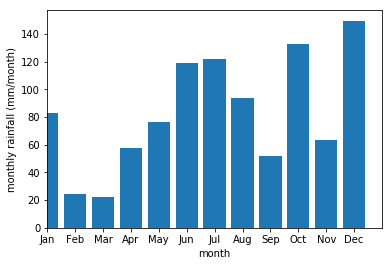

In [62]:
plt.bar(range(12), monthly_rainfall, width=0.8)
plt.xlabel('month')
plt.ylabel('monthly rainfall (mm/month)')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlim(0, 12);

### Date times as index
The datetime of a dataset may also be used as the index of a DataFrame by specifying the column with the dates as the column to use for an index with the `index_col` keyword.  Note that datetimes are given as year-month-day, so `2012-04-01` means April 1, 2012.

In [63]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0, skipinitialspace=True)
display(data)
print('data on April 1:', data.loc['2014-04-01'])
print('data on April 2:', data.loc['2014-04-02'])

,conc
date,
2014-04-01,0.19
2014-04-02,0.23
2014-04-03,0.32
2014-04-04,0.29
2014-04-05,0.32


data on April 1: conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data on April 2: conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


### Resampling
DataFrames have a very powerful feature called resampling. Downsampling refers to going from high frequency to low frequency. For example, going from daily data to monthly data. Upsampling refers to going from low frequency to high frequency. For example going from monthly data to daily data. For both upsampling and downsampling, you need to tell `pandas` how to perform the resampling. Here we discuss downsampling, where we compute monthly totals from daily values. First we load the daily rainfall in Rotterdam in 2012 from the file `rotterdam_rainfall_2012.txt` and specify the dates as the index (this is the column labeled as `YYYYMMDD`). We resample the rain to monthly totals using the `resample` function. You have to tell the `resample` function to what frequency it needs to resample. Common ones are `'A'` for yearly, `'M'` for monthly, `'W'` for weekly, `'D'` for daily, and `'H'` for hourly, but there are many other ones (see  [here](http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html)). The keyword argument `kind` is used to tell `pandas` where to assign the computed value to. You can assign the computed value to the last day of the period, or the first day, or to the entire period (in this case the entire month). The latter is done by specifying `kind='period'`, which is what we will do here.  Finally, you need to specify how to resample. This is done by adding a `numpy` function at the end of the resample statement, like

    dataframe.resample(...).npfunc()
    
where `npfunc` can be any `numpy` function like `mean` for the mean (that is the default), `sum` for the total, `min`, `max`, etc. Calculating the monthly totals and making a bar graph can now be done with `pandas` as follows. 

In [64]:
rain = read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD',
                skipinitialspace=True)

In [67]:
rain.head()

,STN,RH
YYYYMMDD,,
2012-01-01,344,20.7
2012-01-02,344,0.0
2012-01-03,344,14.4
2012-01-04,344,3.6
2012-01-05,344,8.4


In [66]:
rain.RH[rain.RH < 0] = 0  # remove negative values
rain.RH = rain.RH * 0.1 # convert to mm/day

In [71]:
monthlyrain = rain.RH.resample('M', kind='period').sum()
display(monthlyrain)
print(type(monthlyrain))

YYYYMMDD
2012-01     83.0
2012-02     24.3
2012-03     21.9
2012-04     57.6
2012-05     76.5
2012-06    119.0
2012-07    121.6
2012-08     93.4
2012-09     52.0
2012-10    132.6
2012-11     63.3
2012-12    149.5
Freq: M, Name: RH, dtype: float64

<class 'pandas.core.series.Series'>


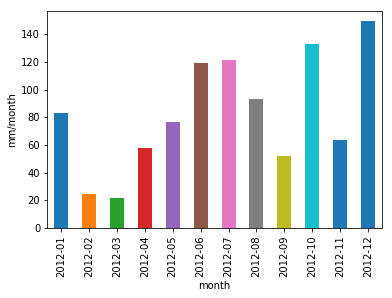

In [72]:
monthlyrain.plot(kind='bar')
plt.ylabel('mm/month')
plt.xlabel('month');

### Exercise 5,<a name="back5"></a> Resample weather data
The file `rotterdam_weather_2000_2010.txt` contains daily weather data at the weather station Rotterdam for the period 2000-2010 (again from the KNMI). Open the data file in an editor to see what is in it. Perform the following tasks:
* Load the data making sure the dates are used as index. 
* Convert the rain and evaporation to mm/day, and the temperature to degrees Celcius. 
* Set any negative rainfall (explained in the file) to zero. 
* Compute total yearly rainfall, total yearly evaporation, and mean yearly temperature. 
* Make a line plot of the yearly rainfall, yearly evaporation, and mean temperature using the `plot` function of `pandas`. Plot the mean temperature on the secondary $y$-axis (use the help function to find out how). 

In [80]:
rotterdam_weather = read_csv('rotterdam_weather_2000_2010.txt',\
                              skiprows=11, skipinitialspace=True,\
                              parse_dates = ['YYYYMMDD'], index_col = 'YYYYMMDD'
                            )

In [86]:
rotterdam_weather.head(20)

,# STN,TG,RH,EV24
YYYYMMDD,,,,
2000-01-01,344,6.6,1.2,0.1
2000-01-02,344,7.6,0.5,0.1
2000-01-03,344,8.5,9.8,0.1
2000-01-04,344,6.6,5.7,0.0
2000-01-05,344,5.2,0.0,0.4
2000-01-06,344,7.7,3.0,0.1
2000-01-07,344,5.9,0.0,0.2
2000-01-08,344,5.8,1.4,0.2
2000-01-09,344,1.9,0.0,0.4


In [82]:
rotterdam_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Data columns (total 4 columns):
# STN    4018 non-null int64
TG       4018 non-null int64
RH       4018 non-null int64
EV24     4018 non-null int64
dtypes: int64(4)
memory usage: 157.0 KB


In [83]:
rotterdam_weather['RH'] = rotterdam_weather['RH'] * 0.1
rotterdam_weather['EV24'] = rotterdam_weather['EV24'] * 0.1
rotterdam_weather['TG'] = rotterdam_weather['TG'] * 0.1

In [84]:
rotterdam_weather.loc[rotterdam_weather.RH < 0, 'RH'] = 0

In [89]:
yearly_rain = rotterdam_weather.RH.resample('A', kind='period').sum()
yearly_evaporation = rotterdam_weather.EV24.resample('A', kind='period').sum()
mean_yearly_temp = rotterdam_weather.TG.resample('A', kind='period').mean()

In [94]:
yearly_rain

YYYYMMDD
2000    1000.2
2001    1072.8
2002     963.8
2003     604.6
2004     925.5
2005     835.0
2006     873.7
2007     993.7
2008     962.9
2009     792.2
2010     906.6
Freq: A-DEC, Name: RH, dtype: float64

In [111]:
yearly_evaporation

YYYYMMDD
2000    556.1
2001    588.1
2002    582.5
2003    653.4
2004    584.9
2005    605.6
2006    621.4
2007    590.0
2008    585.1
2009    621.8
2010    593.3
Freq: A-DEC, Name: EV24, dtype: float64

In [98]:
mean_yearly_temp

YYYYMMDD
2000    11.081694
2001    10.601918
2002    11.012603
2003    10.746575
2004    10.575683
2005    10.870959
2006    11.378904
2007    11.396986
2008    10.683607
2009    10.761644
2010     9.381644
Freq: A-DEC, Name: TG, dtype: float64

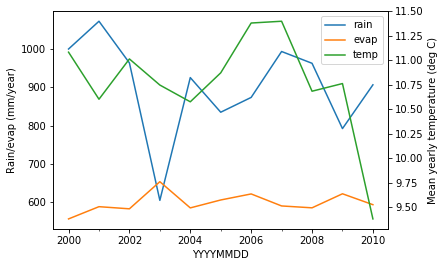

In [123]:
ax1 = yearly_rain.plot()
ax1 = yearly_evaporation.plot()
plt.xlabel('Year')
plt.ylabel('Rain/evap (mm/year)')
ax2 = mean_yearly_temp.plot(secondary_y=True)
plt.ylabel('Mean yearly temperature (deg C)')
plt.legend(ax1.get_lines() + ax2.get_lines(),['rain', 'evap', 'temp'], loc='best')